In [7]:
#script 1
import numpy as np
from statistics import mean, variance, pstdev
import matplotlib.pyplot as plt
# Setting up the time data:
dt = 0.005; # integration step, average neuron resets 200 times per second
T = 150 + dt; # maximum time considered
t = np.arange(0,T,dt)
N= t.size #Amount of data points



def g_gp(x):

    t0=25
    return t0 -16 / (1 + np.exp(5-x/5))

def dg_gp(x):
    
    return -16/5* np.exp(5-x/5) / (np.exp(5-x/5)+1)**2



#initate arrays
mu_x = np.zeros(N)
e_x = np.zeros(N)
e_y = np.zeros(N)
y =np.zeros(N)
x = np.ones(N)*30


omega_x = np.ones(N)*0.5
omega_y = np.zeros(N)
sigma_x = np.zeros(N)
sigma_y = np.zeros(N)
std = np.zeros(N)


omega_x[0] = 0.5
omega_y[0] = 5
mu_v =28
mu_x[0]= 28
std_noise_x = 0
std_noise_y = 0.8

alpha_x = 1
alpha_y = 1

alpha_mux = 1
dmuxvec= [0]

for i in np.arange(0,N-1):
   # x = x + np.random.randn(1)*std_noise
    
    # prior real depth: x == prior: mu_v == 30
    x[i] = 30         # + np.random.randn(1)*std_noise_x       #x[i+1]  gebruiken
    
   
    y[i] = g_gp(x[i])   + np.random.randn(1)*std_noise_y*np.sin(10*1/N*i)  
    # if i<0.3*N:
    #     y[i] = g_gp(x[i])  # + np.random.randn(1)*std_noise_y
    
    # elif i<0.7*N:
    #     y[i] = g_gp(x[i])   + np.random.randn(1)*std_noise_y
    # else:
    #     y[i] = g_gp(x[i])   #+ np.random.randn(1)*std_noise_y


    sigma_x[i] =  1/omega_x[i]
    sigma_y[i] =  1/omega_y[i]
    
    e_x[i] = mu_x[i] - mu_v    # Mu_x[0] = 25 and mu_v = 30 
    e_y[i] = y[i] - g_gp(mu_x[i]) # x = 30 so y(i) = g(30)

    # hidden stsate update
    dFdmu_x = e_x[i]*omega_x[i] - dg_gp(mu_x[i]) * e_y[i]*omega_y[i]
    dmu_x   = 0 - alpha_mux* dFdmu_x
    mu_x[i+1] = mu_x[i] + dt*dmu_x


    #precision update
    #domega_x = alpha_x*(0.5*(1/omega_x[i] - e_x[i]**2))
    domega_y = alpha_y*(0.5*(1/omega_y[i] - e_y[i]**2))
    #omega_x[i+1] = omega_x[i] + dt*domega_x
    omega_y[i+1] = omega_y[i] + dt*domega_y

   
    sigma_x[i+1] =1/ omega_x[i+1]
    sigma_y[i+1] =1/ omega_y[i+1]

0.5423212026427603
[0.5 0.5 0.5 ... 0.5 0.5 0.5]


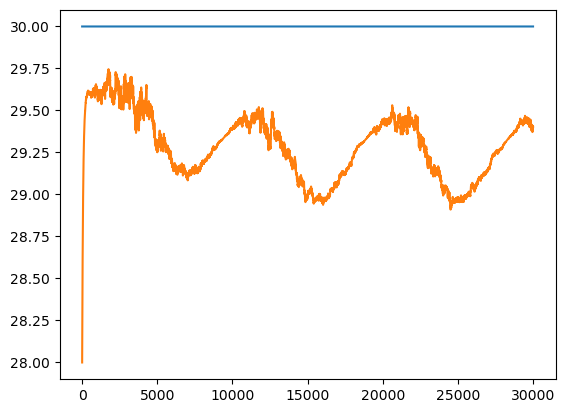

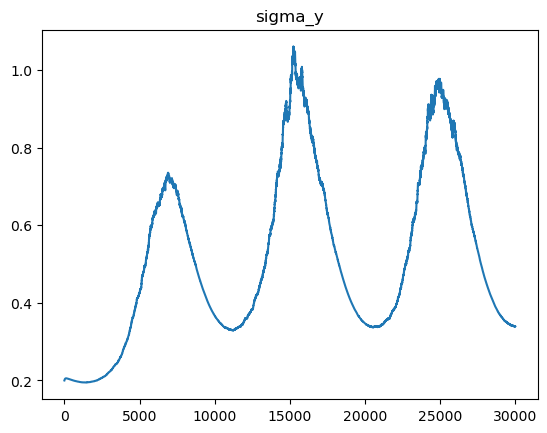

In [8]:
plt.figure()
plt.plot(x)
plt.plot(mu_x)


plt.figure()
#plt.plot(sigma_x)
plt.plot(sigma_y)
plt.title("sigma_y")

print(np.mean(sigma_y[2500:30000]))


print(omega_x)